<font size="5">Section 2: non linear models</font>

### Housekeeping

#### import libraries

Pandas for data management, statsmodels, numpy and sklearn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. semopy for SEM). Remember to use the bash terminal or the enviroment manager to add libraries.

#### read data

Read data files using pandas as noted below. We can clean and organize data in many ways (for example, using the **dropna** command over a dataset).

#### describe data

There are many was to analyze data and do descriptive statistics. A good command to start is ***head***, to describe a section of the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns

%matplotlib inline

In [18]:
# higher ed data
cned = pd.read_csv('../data/cned.csv')
cned.dropna(inplace=True)


In [19]:
cned.reset_index(drop=True, inplace=True)
cned.head()

,region,idc,puntaje,nem,ingreso2,vacantes,ingreso,year,stem,area
0,7,7404,713.0,645.0,26.0,38.0,138,2019,0,Art/Humanities
1,7,7405,643.0,637.0,28.0,39.0,104,2019,0,Art/Humanities
2,7,7402,674.0,692.0,278.0,314.0,1318,2019,0,Art/Humanities
3,7,7406,663.0,655.0,79.0,103.0,438,2019,0,Art/Humanities
4,7,7408,642.0,610.0,41.0,59.0,148,2019,0,Art/Humanities


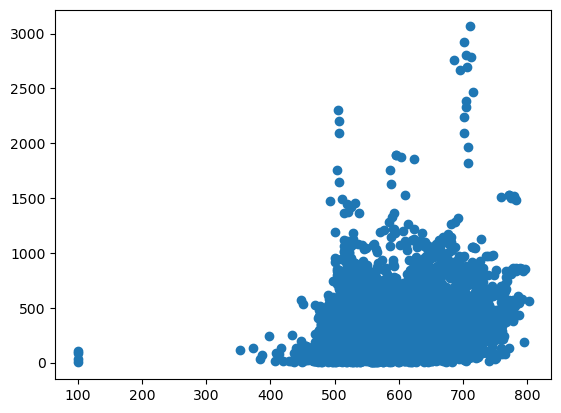

In [20]:
plt.scatter(cned['nem'],cned['ingreso'])

### OLS

We can use statsmodels to estimate a simple OLS regression (linear probability model). 

In [21]:
y=cned['stem']
X=cned[['puntaje','nem','vacantes','year']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   stem   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.016
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           0.000490
Time:                        16:01:05   Log-Likelihood:                -5919.4
No. Observations:                9065   AIC:                         1.185e+04
Df Residuals:                    9060   BIC:                         1.188e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9501      4.999      1.990      0.0

### Probit



In [23]:
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623654
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                         Probit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                0.001818
Time:                        16:01:39   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6035     14.039      1.895      0.058      -0.912      54.119
puntaje        0.0010      0.

### Logit

In [24]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623656
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                          Logit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                0.001816
Time:                        16:01:43   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003859
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8868     23.134      1.897      0.058      -1.455      89.229
puntaje        0.0015      0.

### Poisson

0    138
1    104
3    438
4    148
5    383
Name: ingreso, dtype: int64

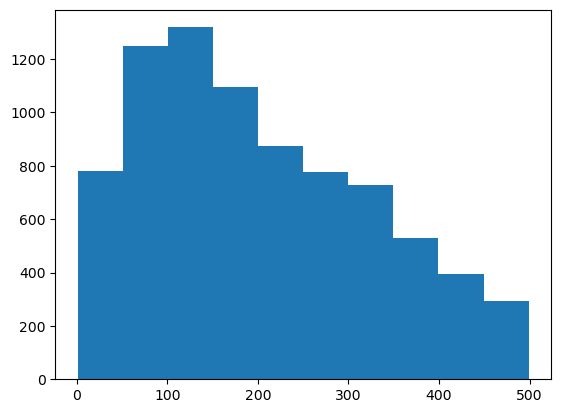

In [25]:
subset=cned.loc[cned['ingreso']<500]
y=subset['ingreso']
X=subset[['puntaje','nem','vacantes','year']]
plt.hist(subset.ingreso)
subset.ingreso.head()

In [26]:
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0395e+05
Date:                Tue, 16 Apr 2024   Deviance:                   3.5249e+05
Time:                        16:03:10   Pearson chi2:                 3.16e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0002   3.49e-05      5.285      0.0

In [27]:
print("fitted lambda")
print(poisson.mu)

fitted lambda
[208.98645684 203.53777853 438.06479834 ...  81.22697075  96.58979789
  95.13085338]


### Negative Binomial

In [28]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49790.
Date:                Tue, 16 Apr 2024   Deviance:                       2200.2
Time:                        16:03:21   Pearson chi2:                 1.56e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2119
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0002      0.000      0.355      0.7

c:\Users\juanc\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [29]:
print("fitted lambda")
print(negbin.mu)

fitted lambda
[183.63586581 180.51289539 620.49493074 ...  61.5069485   72.77267143
  74.70050814]


### Test overdispersion

A simple test for overdispersion can be determined with the results of the Poisson model, using the ratio of Pearson chi2 / Df Residuals. A value larger than 1 indicates overdispersion. In the case above (6), data suggets overdispersion.

The Negative Binomial model estimated above is using a value of $\theta$ (or $\alpha=1/\theta$) equal to 1. In order to determine the appropiate value of $\alpha$, you can estimate a simple regression using the output of the Poisson model:

1. Construct the following variable aux=$[(y-\lambda)^2-\lambda]/\lambda$
2. Regress the variable aux with $\lambda$ as the only explanatory variable (no constant)
3. The estimated value is an appropiate guess for $\ln \alpha$

In the model of the previous section, just use the options on sm.families.NegativeBinomial, in order to manually enter the value of alpha. See example below.

In [30]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                ingreso   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.396
Method:                 Least Squares   F-statistic:                              5275.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:03:28   Log-Likelihood:                         -44571.
No. Observations:                8041   AIC:                                  8.914e+04
Df Residuals:                    8040   BIC:                                  8.915e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=2.71)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54033.
Date:                Tue, 16 Apr 2024   Deviance:                       818.47
Time:                        16:04:19   Pearson chi2:                     577.
No. Iterations:                    12   Pseudo R-squ. (CS):            0.08446
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0002      0.001      0.222      0.8

<font size="3">**Tarea 1**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* a mas tardar el dia 16/04/23 hasta las 21:00. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **disease.csv**.

Las variables tienen la siguiente descripcion:

Glucose: This is the level of glucose in the blood, measured in milligrams per deciliter (mg/dL)

Cholesterol: This is the level of cholesterol in the blood, measured in milligrams per deciliter (mg/dL)

Hemoglobin: This is the protein in red blood cells that carries oxygen from the lungs to the rest of the body

Platelets: Platelets are blood cells that help with clotting

White Blood Cells (WBC): These are cells of the immune system that help fight infections

Red Blood Cells (RBC): These are the cells that carry oxygen from the lungs to the rest of the body

Hematocrit: This is the percentage of blood volume that is occupied by red blood cells

Mean Corpuscular Volume (MCV): This is the average volume of red blood cells

Mean Corpuscular Hemoglobin (MCH): This is the average amount of hemoglobin in a red blood cell

Insulin: This is a hormone that helps regulate blood sugar levels

BMI (Body Mass Index): This is a measure of body fat based on height and weight

Systolic Blood Pressure (SBP): This is the pressure in the arteries when the heart beats

Diastolic Blood Pressure (DBP): This is the pressure in the arteries when the heart is at rest between beats

Triglycerides: These are a type of fat found in the blood, measured in milligrams per deciliter (mg/dL)

HbA1c (Glycated Hemoglobin): This is a measure of average blood sugar levels over the past two to three months

LDL (Low-Density Lipoprotein) Cholesterol: This is the "bad" cholesterol that can build up in the arteries

HDL (High-Density Lipoprotein) Cholesterol: This is the "good" cholesterol that helps remove LDL cholesterol from the arteries

Heart Rate: This is the number of heartbeats per minute (bpm)

Creatinine: This is a waste product produced by muscles and filtered out of the blood by the kidneys

C-reactive Protein (CRP): This is a marker of inflammation in the body

Disease: This indicates the number of diseases (0 indicates healthy)

Preguntas:

1. Cargar la base de datos *disease.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 


2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que una persona tenga al menos una enfermedad. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

6. Ejecute un modelo Poisson para explicar el numero de enfermedades que tiene una persona. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

7. Determine la existencia de sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?